In [29]:
import statsmodels.api as sm # this loads statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [7]:
data.DESCR #scikit-learn datasets come with a handy description attached, which look ugly when printed directly

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [8]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [9]:
df.describe() # we can use descripe to get a nice overview of the descriptive statistics of each column in a dataframe

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

In [10]:
#Merge the dataframe with the data with the dataframe with the target.
df_target = df.merge(target, left_index = True, right_index = True)

#Get the correlation matrix of the dataframe above.
df_target.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [11]:
#Import seaborn to improve data visualization.
import seaborn as sb

#Get a plot that visually shows the correalations between every pair of variables.
sb.heatmap(df_target.corr(), cmap=sb.diverging_palette(20, 220, n=200))

In [12]:
#Load 'statsmodels.formula.spi' so a constant is automatically added to the data and an intercept in fitted.
import statsmodels.formula.api as smf
#Load 'summary_col' to help us summarize multiple results instances side-by-side.
from statsmodels.iolib.summary2 import summary_col

#We will do a linear regression for each of the X variables, one at a time, then pick the X variable that had the highest R2.
#Next we will do a multiple regression with the X variable from step 1 and each of the other X variables.
#We will add the X variable that increases the R2 by the greatest amount.
#We continue adding X variables until adding another X variable does not significantly increase the R2.

m1 = smf.ols('MEDV ~ RM', data = df_target).fit()
m2 = smf.ols('MEDV ~ ZN', data = df_target).fit()
m3 = smf.ols('MEDV ~ B', data = df_target).fit()
m4 = smf.ols('MEDV ~ DIS', data = df_target).fit()
#CHAS is a dummy variable so we won't use it for regression.
m5 = smf.ols('MEDV ~ AGE', data = df_target).fit()
m6 = smf.ols('MEDV ~ RAD', data = df_target).fit()
m7 = smf.ols('MEDV ~ CRIM', data = df_target).fit()
m8 = smf.ols('MEDV ~ NOX', data = df_target).fit()
m9 = smf.ols('MEDV ~ TAX', data = df_target).fit()
m10 = smf.ols('MEDV ~ INDUS', data = df_target).fit()
m11 = smf.ols('MEDV ~ PTRATIO', data = df_target).fit()
m12 = smf.ols('MEDV ~ LSTAT', data = df_target).fit()

summary_col([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

<class 'statsmodels.iolib.summary2.Summary'>
"""

==================================================================================================================================================================
           MEDV I  MEDV II  MEDV III MEDV IIII MEDV IIIII MEDV IIIIII MEDV IIIIIII MEDV IIIIIIII MEDV IIIIIIIII MEDV IIIIIIIIII MEDV IIIIIIIIIII MEDV IIIIIIIIIIII
------------------------------------------------------------------------------------------------------------------------------------------------------------------
AGE                                            -0.1232                                                                                                            
                                               (0.0135)                                                                                                           
B                           0.0336                                                                                                                                
                            (0.0042)                                                                                                                              
CRIM                                                                  -0.4152                                                                                     
                                                                      (0.0439)                                                                                    
DIS                                  1.0916                                                                                                                       
                                     (0.1884)                                                                                                                     
INDUS                                                                                                           -0.6485                                           
                                                                                                                (0.0523)                                          
Intercept -34.6706 20.9176  10.5510  18.3901   30.9787    26.3821     24.0331      41.3459       32.9707        29.7549         62.3446          34.5538          
          (2.6498) (0.4247) (1.5575) (0.8174)  (0.9991)   (0.5618)    (0.4091)     (1.8112)      (0.9483)       (0.6834)        (3.0292)         (0.5626)         
LSTAT                                                                                                                                            -0.9500          
                                                                                                                                                 (0.0387)         
NOX                                                                                -33.9161                                                                       
                                                                                   (3.1963)                                                                       
PTRATIO                                                                                                                         -2.1572                           
                                                                                                                                (0.1630)                          
RAD                                                       -0.4031                                                                                                 
                                                          (0.0435)                                                                                                
RM        9.1021                                                                                                                                                  
          (0.4190)                    

In [14]:
#LSTAT had the highest R2.

m1 = smf.ols('MEDV ~ LSTAT + RM', data = df_target).fit()
m2 = smf.ols('MEDV ~ LSTAT + ZN', data = df_target).fit()
m3 = smf.ols('MEDV ~ LSTAT + B', data = df_target).fit()
m4 = smf.ols('MEDV ~ LSTAT + DIS', data = df_target).fit()
#CHAS is a dummy variable so we won't use it for regression.
m5 = smf.ols('MEDV ~ LSTAT + AGE', data = df_target).fit()
m6 = smf.ols('MEDV ~ LSTAT + RAD', data = df_target).fit()
m7 = smf.ols('MEDV ~ LSTAT + CRIM', data = df_target).fit()
m8 = smf.ols('MEDV ~ LSTAT + NOX', data = df_target).fit()
m9 = smf.ols('MEDV ~ LSTAT + TAX', data = df_target).fit()
m10 = smf.ols('MEDV ~ LSTAT + INDUS', data = df_target).fit()
m11 = smf.ols('MEDV ~ LSTAT + PTRATIO', data = df_target).fit()

summary_col([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

<class 'statsmodels.iolib.summary2.Summary'>
"""

================================================================================================================================================
           MEDV I  MEDV II  MEDV III MEDV IIII MEDV IIIII MEDV IIIIII MEDV IIIIIII MEDV IIIIIIII MEDV IIIIIIIII MEDV IIIIIIIIII MEDV IIIIIIIIIII
------------------------------------------------------------------------------------------------------------------------------------------------
AGE                                            0.0345                                                                                           
                                               (0.0122)                                                                                         
B                           0.0074                                                                                                              
                            (0.0032)                                                                                                            
CRIM                                                                  -0.0704                                                                   
                                                                      (0.0360)                                                                  
DIS                                  -0.6768                                                                                                    
                                     (0.1485)                                                                                                   
INDUS                                                                                                           -0.0809                         
                                                                                                                (0.0505)                        
Intercept -1.3583  33.7997  31.4859  38.3775   33.2228    34.6128     34.3192      34.1021       35.8350        34.8609         54.0468         
          (3.1728) (0.6714) (1.4602) (1.0041)  (0.7308)   (0.5676)    (0.5737)     (1.4015)      (0.7355)       (0.5936)        (2.2422)        
LSTAT     -0.6424  -0.9143  -0.9155  -1.0492   -1.0321    -0.9326     -0.9114      -0.9600       -0.8831        -0.9031         -0.8202         
          (0.0437) (0.0424) (0.0415) (0.0438)  (0.0482)   (0.0444)    (0.0434)     (0.0481)      (0.0459)       (0.0485)        (0.0388)        
NOX                                                                                1.0425                                                       
                                                                                   (2.9613)                                                     
PTRATIO                                                                                                                         -1.1453         
                                                                                                                                (0.1281)        
RAD                                                       -0.0293                                                                               
                                                          (0.0364)                                                                              
RM        5.0948                                                                                                                                
          (0.4445)                                                                                                                              
TAX                                                                                              -0.0052                                        
                                                                                                 (0.0019)                                       
ZN                 0.0265          

In [15]:
#LSTAT + RM had the highest R2.

m1 = smf.ols('MEDV ~ LSTAT + RM + ZN', data = df_target).fit()
m2 = smf.ols('MEDV ~ LSTAT + RM + B', data = df_target).fit()
m3 = smf.ols('MEDV ~ LSTAT + RM + DIS', data = df_target).fit()
#CHAS is a dummy variable so we won't use it for regression.
m4 = smf.ols('MEDV ~ LSTAT + RM + AGE', data = df_target).fit()
m5 = smf.ols('MEDV ~ LSTAT + RM + RAD', data = df_target).fit()
m6 = smf.ols('MEDV ~ LSTAT + RM + CRIM', data = df_target).fit()
m7 = smf.ols('MEDV ~ LSTAT + RM + NOX', data = df_target).fit()
m8 = smf.ols('MEDV ~ LSTAT + RM + TAX', data = df_target).fit()
m9 = smf.ols('MEDV ~ LSTAT + RM + INDUS', data = df_target).fit()
m10 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO', data = df_target).fit()

summary_col([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

<class 'statsmodels.iolib.summary2.Summary'>
"""

===============================================================================================================================
           MEDV I  MEDV II  MEDV III MEDV IIII MEDV IIIII MEDV IIIIII MEDV IIIIIII MEDV IIIIIIII MEDV IIIIIIIII MEDV IIIIIIIIII
-------------------------------------------------------------------------------------------------------------------------------
AGE                                  0.0091                                                                                    
                                     (0.0112)                                                                                  
B                  0.0120                                                                                                      
                   (0.0029)                                                                                                    
CRIM                                                      -0.1029                                                              
                                                          (0.0320)                                                             
DIS                         -0.4613                                                                                            
                            (0.1350)                                                                                           
INDUS                                                                                            -0.0636                       
                                                                                                 (0.0451)                      
Intercept -1.4606  -8.0305  2.8083   -1.1753   -2.2011    -2.5623     -0.7667      -0.4987       -0.9687        18.5671        
          (3.1711) (3.5123) (3.3680) (3.1819)  (3.1763)   (3.1660)    (3.2862)     (3.1402)      (3.1817)       (3.9132)       
LSTAT     -0.6240  -0.5718  -0.7233  -0.6685   -0.5865    -0.5785     -0.6229      -0.5526       -0.6067        -0.5718        
          (0.0457) (0.0463) (0.0493) (0.0544)  (0.0492)   (0.0477)    (0.0519)     (0.0493)      (0.0505)       (0.0422)       
NOX                                                                   -1.8456                                                  
                                                                      (2.6505)                                                 
PTRATIO                                                                                                         -0.9307        
                                                                                                                (0.1177)       
RAD                                            -0.0794                                                                         
                                               (0.0326)                                                                        
RM        5.0455   5.3357   4.8734   5.0191    5.2370     5.2170      5.1243       5.1995        5.0738         4.5154         
          (0.4456) (0.4413) (0.4446) (0.4543)  (0.4461)   (0.4420)    (0.4467)     (0.4396)      (0.4443)       (0.4259)       
TAX                                                                                -0.0065                                     
                                                                                   (0.0017)                                    
ZN        0.0158                                                                                                               
          (0.0116)                                                                                                             
N         506      506      506      506       506        506         506          506           506            506            
R2        0.64     0.65     0.65     0.64      0.64       0.65        0.64         0.65          0.64         

In [16]:
#LSTAT + RM + PTRATIO had the highest R2.

m1 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + ZN', data = df_target).fit()
m2 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B', data = df_target).fit()
m3 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + DIS', data = df_target).fit()
#CHAS is a dummy variable so we won't use it for regression.
m4 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + AGE', data = df_target).fit()
m5 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + RAD', data = df_target).fit()
m6 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + CRIM', data = df_target).fit()
m7 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + NOX', data = df_target).fit()
m8 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + TAX', data = df_target).fit()
m9 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + INDUS', data = df_target).fit()

summary_col([m1,m2,m3,m4,m5,m6,m7,m8,m9],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

<class 'statsmodels.iolib.summary2.Summary'>
"""

===============================================================================================================
           MEDV I  MEDV II  MEDV III MEDV IIII MEDV IIIII MEDV IIIIII MEDV IIIIIII MEDV IIIIIIII MEDV IIIIIIIII
---------------------------------------------------------------------------------------------------------------
AGE                                  0.0165                                                                    
                                     (0.0106)                                                                  
B                  0.0105                                                                                      
                   (0.0027)                                                                                    
CRIM                                                      -0.0654                                              
                                                          (0.0308)                                             
DIS                         -0.5519                                                                            
                            (0.1270)                                                                           
INDUS                                                                                            0.0076        
                                                                                                 (0.0436)      
Intercept 19.1480  12.0548  24.4714  19.2437   19.2217    16.9233     19.3958      17.6745       18.6150       
          (3.9930) (4.2197) (4.0780) (3.9317)  (4.1556)   (3.9756)    (4.0091)     (3.9730)      (3.9267)      
LSTAT     -0.5797  -0.5125  -0.6654  -0.6182   -0.5812    -0.5343     -0.5464      -0.5451       -0.5757       
          (0.0436) (0.0445) (0.0468) (0.0516)  (0.0467)   (0.0456)    (0.0499)     (0.0471)      (0.0479)      
NOX                                                                   -2.3828                                  
                                                                      (2.5017)                                 
PTRATIO   -0.9553  -0.8990  -0.9736  -0.9468   -0.9535    -0.8897     -0.9338      -0.8752       -0.9351       
          (0.1223) (0.1164) (0.1160) (0.1179)  (0.1273)   (0.1188)    (0.1177)     (0.1254)      (0.1205)      
RAD                                            0.0157                                                          
                                               (0.0334)                                                        
RM        4.5264   4.7458   4.2238   4.3678    4.4730     4.6186      4.5517       4.5861        4.5152        
          (0.4263) (0.4245) (0.4238) (0.4357)  (0.4356)   (0.4272)    (0.4276)     (0.4292)      (0.4263)      
TAX                                                                                -0.0022                     
                                                                                   (0.0018)                    
ZN        -0.0084                                                                                              
          (0.0114)                                                                                             
N         506      506      506      506       506        506         506          506           506           
R2        0.68     0.69     0.69     0.68      0.68       0.68        0.68         0.68          0.68          
===============================================================================================================
Standard errors in parentheses.
"""

In [17]:
#LSTAT + RM + PTRATIO + B had the highest R2.

m1 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + ZN', data = df_target).fit()
m2 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS', data = df_target).fit()
#CHAS is a dummy variable so we won't use it for regression.
m3 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + AGE', data = df_target).fit()
m4 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + RAD', data = df_target).fit()
m5 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + CRIM', data = df_target).fit()
m6 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + NOX', data = df_target).fit()
m7 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + TAX', data = df_target).fit()
m8 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + INDUS', data = df_target).fit()

summary_col([m1,m2,m3,m4,m5,m6,m7,m8],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

<class 'statsmodels.iolib.summary2.Summary'>
"""

================================================================================================
           MEDV I  MEDV II  MEDV III MEDV IIII MEDV IIIII MEDV IIIIII MEDV IIIIIII MEDV IIIIIIII
------------------------------------------------------------------------------------------------
AGE                         0.0182                                                              
                            (0.0105)                                                            
B         0.0105   0.0120   0.0106   0.0120    0.0096     0.0104      0.0103       0.0109       
          (0.0027) (0.0027) (0.0027) (0.0029)  (0.0028)   (0.0028)    (0.0029)     (0.0028)     
CRIM                                           -0.0389                                          
                                               (0.0315)                                         
DIS                -0.6152                                                                      
                   (0.1255)                                                                     
INDUS                                                                              0.0382       
                                                                                   (0.0437)     
Intercept 12.6691  17.7037  12.6805  13.6094   11.6150    12.2569     12.0268      12.0257      
          (4.2851) (4.2837) (4.2267) (4.3020)  (4.2324)   (4.4039)    (4.2280)     (4.2208)     
LSTAT     -0.5211  -0.6084  -0.5624  -0.5399   -0.4951    -0.5087     -0.5100      -0.5298      
          (0.0456) (0.0477) (0.0529) (0.0470)  (0.0466)   (0.0504)    (0.0476)     (0.0486)     
NOX                                                       -0.4097                               
                                                          (2.5274)                              
PTRATIO   -0.9262  -0.9423  -0.9161  -0.9826   -0.8772    -0.8998     -0.8927      -0.9199      
          (0.1209) (0.1141) (0.1166) (0.1254)  (0.1176)   (0.1166)    (0.1240)     (0.1188)     
RAD                                  0.0611                                                     
                                     (0.0346)                                                   
RM        4.7591   4.4538   4.5879   4.6162    4.7882     4.7500      4.7515       4.7542       
          (0.4249) (0.4193) (0.4333) (0.4299)  (0.4257)   (0.4257)    (0.4266)     (0.4247)     
TAX                                                                   -0.0003                   
                                                                      (0.0018)                  
ZN        -0.0094                                                                               
          (0.0113)                                                                              
N         506      506      506      506       506        506         506          506          
R2        0.69     0.70     0.69     0.69      0.69       0.69        0.69         0.69         
================================================================================================
Standard errors in parentheses.
"""

In [18]:
#LSTAT + RM + PTRATIO + B + DIS had the highest R2.

m1 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + ZN', data = df_target).fit()
#CHAS is a dummy variable so we won't use it for regression.
m2 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + AGE', data = df_target).fit()
m3 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + RAD', data = df_target).fit()
m4 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + CRIM', data = df_target).fit()
m5 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + NOX', data = df_target).fit()
m6 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + TAX', data = df_target).fit()
m7 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + INDUS', data = df_target).fit()

summary_col([m1,m2,m3,m4,m5,m6,m7],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

<class 'statsmodels.iolib.summary2.Summary'>
"""

==================================================================================
           MEDV I  MEDV II  MEDV III MEDV IIII MEDV IIIII MEDV IIIIII MEDV IIIIIII
----------------------------------------------------------------------------------
AGE                -0.0231                                                        
                   (0.0133)                                                       
B         0.0124   0.0122   0.0123   0.0106    0.0096     0.0105      0.0110      
          (0.0027) (0.0027) (0.0028) (0.0028)  (0.0027)   (0.0028)    (0.0027)    
CRIM                                 -0.0639                                      
                                     (0.0311)                                     
DIS       -0.8678  -0.7948  -0.6005  -0.6557   -1.1596    -0.7001     -0.8449     
          (0.1565) (0.1621) (0.1313) (0.1266)  (0.1666)   (0.1328)    (0.1548)    
INDUS                                                                 -0.1321     
                                                                      (0.0527)    
Intercept 17.6179  18.5565  17.9142  17.3531   30.5170    18.1103     19.9133     
          (4.2578) (4.3028) (4.3225) (4.2733)  (4.9596)   (4.2777)    (4.3515)    
LSTAT     -0.6144  -0.5730  -0.6122  -0.5861   -0.5455    -0.5884     -0.5846     
          (0.0474) (0.0517) (0.0487) (0.0487)  (0.0484)   (0.0487)    (0.0484)    
NOX                                            -15.8424                           
                                               (3.2789)                           
PTRATIO   -0.8539  -0.9333  -0.9599  -0.9094   -1.0121    -0.8644     -0.8863     
          (0.1182) (0.1140) (0.1231) (0.1149)  (0.1126)   (0.1209)    (0.1157)    
RAD                         0.0136                                                
                            (0.0355)                                              
RM        4.2817   4.5696   4.4319   4.5041    4.3548     4.4893      4.3158      
          (0.4217) (0.4237) (0.4235) (0.4187)  (0.4108)   (0.4186)    (0.4207)    
TAX                                                       -0.0036                 
                                                          (0.0019)                
ZN        0.0367                                                                  
          (0.0138)                                                                
N         506      506      506      506       506        506         506         
R2        0.71     0.70     0.70     0.70      0.72       0.70        0.71        
==================================================================================
Standard errors in parentheses.
"""

In [19]:
#LSTAT + RM + PTRATIO + B + DIS + NOX had the highest R2.

m1 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + NOX + ZN', data = df_target).fit()
#CHAS is a dummy variable so we won't use it for regression.
m2 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + NOX + AGE', data = df_target).fit()
m3 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + NOX + RAD', data = df_target).fit()
m4 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + NOX + CRIM', data = df_target).fit()
m5 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + NOX + TAX', data = df_target).fit()
m6 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + NOX + INDUS', data = df_target).fit()

summary_col([m1,m2,m3,m4,m5,m6],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

<class 'statsmodels.iolib.summary2.Summary'>
"""

=====================================================================
           MEDV I  MEDV II  MEDV III MEDV IIII MEDV IIIII MEDV IIIIII
---------------------------------------------------------------------
AGE                -0.0060                                           
                   (0.0135)                                          
B         0.0100   0.0097   0.0112   0.0086    0.0097     0.0095     
          (0.0027) (0.0027) (0.0027) (0.0027)  (0.0027)   (0.0027)   
CRIM                                 -0.0514                         
                                     (0.0306)                        
DIS       -1.4117  -1.1919  -1.1741  -1.1755   -1.1604    -1.1880    
          (0.1896) (0.1818) (0.1659) (0.1666)  (0.1669)   (0.1734)   
INDUS                                                     -0.0339    
                                                          (0.0570)   
Intercept 30.4268  30.3949  34.5902  29.8434   30.6720    30.3641    
          (4.9281) (4.9711) (5.2109) (4.9667)  (5.0713)   (4.9695)   
LSTAT     -0.5514  -0.5379  -0.5578  -0.5295   -0.5463    -0.5429    
          (0.0482) (0.0513) (0.0484) (0.0493)  (0.0487)   (0.0486)   
NOX       -15.8367 -15.4160 -19.1324 -15.3581  -16.0769   -14.9515   
          (3.2580) (3.4179) (3.5314) (3.2855)  (3.6370)   (3.6065)   
PTRATIO   -0.9237  -1.0078  -1.1441  -0.9834   -1.0197    -0.9937    
          (0.1165) (0.1131) (0.1245) (0.1137)  (0.1239)   (0.1168)   
RAD                         0.0910                                   
                            (0.0374)                                 
RM        4.1830   4.3877   4.1879   4.3983    4.3503     4.3249     
          (0.4130) (0.4177) (0.4144) (0.4108)  (0.4123)   (0.4141)   
TAX                                            0.0003                
                                               (0.0020)              
ZN        0.0367                                                     
          (0.0135)                                                   
N         506      506      506      506       506        506        
R2        0.72     0.72     0.72     0.72      0.72       0.72       
=====================================================================
Standard errors in parentheses.
"""

In [20]:
#From here on it doesn't matter which vaeriable we choose because the value of R2 will remain the same.
#Let's do one last comparison.

#CHAS is a dummy variable so we won't use it for regression.
m1 = smf.ols('MEDV ~ LSTAT', data = df_target).fit()
m2 = smf.ols('MEDV ~ LSTAT + RM', data = df_target).fit()
m3 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO', data = df_target).fit()
m4 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B', data = df_target).fit()
m5 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS', data = df_target).fit()
m6 = smf.ols('MEDV ~ LSTAT + RM + PTRATIO + B + DIS + NOX', data = df_target).fit()

summary_col([m1,m2,m3,m4,m5,m6],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

<class 'statsmodels.iolib.summary2.Summary'>
"""

=====================================================================
           MEDV I  MEDV II  MEDV III MEDV IIII MEDV IIIII MEDV IIIIII
---------------------------------------------------------------------
B                                    0.0105    0.0120     0.0096     
                                     (0.0027)  (0.0027)   (0.0027)   
DIS                                            -0.6152    -1.1596    
                                               (0.1255)   (0.1666)   
Intercept 34.5538  -1.3583  18.5671  12.0548   17.7037    30.5170    
          (0.5626) (3.1728) (3.9132) (4.2197)  (4.2837)   (4.9596)   
LSTAT     -0.9500  -0.6424  -0.5718  -0.5125   -0.6084    -0.5455    
          (0.0387) (0.0437) (0.0422) (0.0445)  (0.0477)   (0.0484)   
NOX                                                       -15.8424   
                                                          (3.2789)   
PTRATIO                     -0.9307  -0.8990   -0.9423    -1.0121    
                            (0.1177) (0.1164)  (0.1141)   (0.1126)   
RM                 5.0948   4.5154   4.7458    4.4538     4.3548     
                   (0.4445) (0.4259) (0.4245)  (0.4193)   (0.4108)   
N         506      506      506      506       506        506        
R2        0.54     0.64     0.68     0.69      0.70       0.72       
=====================================================================
Standard errors in parentheses.
"""

In [21]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   5.0  311.0   
12    0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509   5.0  311.0   
13    0.62976   0.0   8.14   0.0  0.538  5.949   61.8  4.7075   4.0  307.0   
14    0.63796   0.0   8.14   0.0  0.538  6.096   84.5  4.4619   4.0  307.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986   4.0  307.0   
17    0.78420   0.0   8.14   0.0  0.538  5.990   81.7  4.2579   4.0  307.0   
18    0.80271   0.0   8.14   0.0  0.538  5.456   36.6  3.7965   4.0  307.0   
19    0.72580   0.0   8.14   0.0  0.538  5.727   69.5  3.7965   4.0  307.0   
20    1.25179   0.0   8.14   0.0  0.538  5.570   98.1  3.7979   4.0  307.0   
21    0.85204   0.0   8.14   0.0  0.538  5.965   89.2  4.0123   4.0  307.0   
22    1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
23    0.98843   0.0   8.14   0.0  0.538  5.813  100.0  4.0952   4.0  307.0   
24    0.75026   0.0   8.14   0.0  0.538  5.924   94.1  4.3996   4.0  307.0   
25    0.84054   0.0   8.14   0.0  0.538  5.599   85.7  4.4546   4.0  307.0   
26    0.67191   0.0   8.14   0.0  0.538  5.813   90.3  4.6820   4.0  307.0   
27    0.95577   0.0   8.14   0.0  0.538  6.047   88.8  4.4534   4.0  307.0   
28    0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
29    1.00245   0.0   8.14   0.0  0.538  6.674   87.3  4.2390   4.0  307.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
476   4.87141   0.0  18.10   0.0  0.614  6.484   93.6  2.3053  24.0  666.0   
477  15.02340   0.0  18.10   0.0  0.614  5.304   97.3  2.1007  24.0  666.0   
478  10.23300   0.0  18.10   0.0  0.614  6.185   96.7  2.1705  24.0  666.0   
479  14.33370   0.0  18.10   0.0  0.614  6.229   88.0  1.9512  24.0  666.0   
480   5.82401   0.0  18.10   0.0  0.532  6.242   64.7  3.4242  24.0  666.0   
481   5.70818   0.0  18.10   0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
482   5.73116   0.0  18.10   0.0  0.532  7.061   77.0  3.4106  24.0  666.0   
483   2.81838   0.0  18.10   0.0  0.532  5.762   40.3  4.0983  24.0  666.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
485   3.67367   0.0  18.10   0.0  0.583  6.312   51.9  3.9917  24.0  666.0   
486   5.69175   0.0  18.10   0.0  0.583  6.114   79.8  3.5459  24.0  666.0   
487   4.83567   0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
488   0.15086   0.0  27.74   0.0  0.609  5.454   92.7  1.8209   4.0  711.0   
489   0.18337   0.0  27.74   0.0  0.609  5.414   98.3  1.7554   4.0  711.0   
490   0.20746   0.0  27.74   0.0  0.609  5.093   98.0  1.8226   4.0  711.0   
491   0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
492   0.11132   0.0  27.74   0.0  0.609  5.983   83.5  2.1099   4.0  711.0   
493   0.17331   0.0   9.69   0.0  0.585  5.707   54.0  2.3817   6.0  391.0   
494   0.27957   0.0   9.69   0.0  0.585  5.926   42.6  2.3817   6.0  391.0   
495   0.17899   0.0   9.69   0.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components= df.shape[1])

pc = pca.fit_transform(X_scaled)

In [24]:
eigen_values = pca.explained_variance_

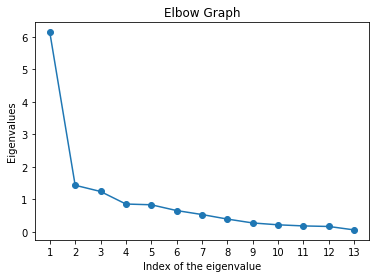

In [27]:
#elbow graph

possibilities = range(1, 14)

plt.plot(possibilities, eigen_values, '-o')
plt.xlabel('Index of the eigenvalue')
plt.ylabel('Eigenvalues')
plt.xticks(possibilities)
plt.title('Elbow Graph')
plt.show()

In [30]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47129606, 0.581548  , 0.67713389, 0.74310121, 0.80731782,
       0.8578876 , 0.89906884, 0.92953786, 0.9508412 , 0.96778257,
       0.98209137, 0.99511467, 1.        ])

In [34]:
pca = PCA(n_components=4)

pc = pca.fit_transform(X_scaled)

In [35]:
pca.components_

array([[ 0.2509514 , -0.25631454,  0.34667207,  0.00504243,  0.34285231,
        -0.18924257,  0.3136706 , -0.32154387,  0.31979277,  0.33846915,
         0.20494226, -0.20297261,  0.30975984],
       [-0.31525237, -0.3233129 ,  0.11249291,  0.45482914,  0.21911553,
         0.14933154,  0.31197778, -0.34907   , -0.27152094, -0.23945365,
        -0.30589695,  0.23855944, -0.07432203],
       [ 0.24656649,  0.29585782, -0.01594592,  0.28978082,  0.12096411,
         0.59396117, -0.01767481, -0.04973627,  0.28725483,  0.22074447,
        -0.32344627, -0.3001459 , -0.26700025],
       [ 0.06177071,  0.12871159,  0.01714571,  0.81594136, -0.12822614,
        -0.28059184, -0.17520603,  0.21543585,  0.13234996,  0.10333509,
         0.28262198,  0.1684985 ,  0.06941441]])

In [39]:
result = (pca.components_.T * np.sqrt(pca.explained_variance_)).T

In [40]:
df_result = pd.DataFrame(result, columns=df.columns) 
df_result

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0  0.621781 -0.635070  0.858948  0.012494  0.849484 -0.468886  0.777181   
1 -0.377792 -0.387452  0.134809  0.545058  0.262584  0.178956  0.373868   
2  0.275126  0.330127 -0.017793  0.323346  0.134975  0.662760 -0.019722   
3  0.057260  0.119312  0.015894  0.756353 -0.118862 -0.260100 -0.162411   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0 -0.796688  0.792350  0.838624  0.507785 -0.502905  0.767491  
1 -0.418318 -0.325385 -0.286956 -0.366581  0.285885 -0.089066  
2 -0.055497  0.320528  0.246313 -0.360911 -0.334912 -0.297927  
3  0.199703  0.122684  0.095789  0.261982  0.156193  0.064345

In [41]:
df_result.to_csv('pca.csv',index=False)